In [1]:
# Required packages
library(knitr)
#--------------------------------------------------------------------
# softmax function: Recursive formula
#--------------------------------------------------------------------
softmax <- function(par){
  n.par <- length(par)
  par1 <- sort(par, decreasing = TRUE)
  Lk <- par1[1]
  for (k in 1:(n.par-1)) {
    Lk <- max(par1[k+1], Lk) + log1p(exp(-abs(par1[k+1] - Lk))) 
  }
  val <- exp(par - Lk)
  return(val)
}

# Example 1
vec <- c(-1,2,1,-3)
sm <- softmax(vec)
print(sm)

[1] 0.034952901 0.702047789 0.258268948 0.004730361


In [12]:
print(softmax(c(1,1,1,2)))

[1] 0.1748777 0.1748777 0.1748777 0.4753669


In [2]:

df<- read.csv("../movies/movie2004_2019_ver1.csv")

In [4]:

nrow(df)

[1] 3029

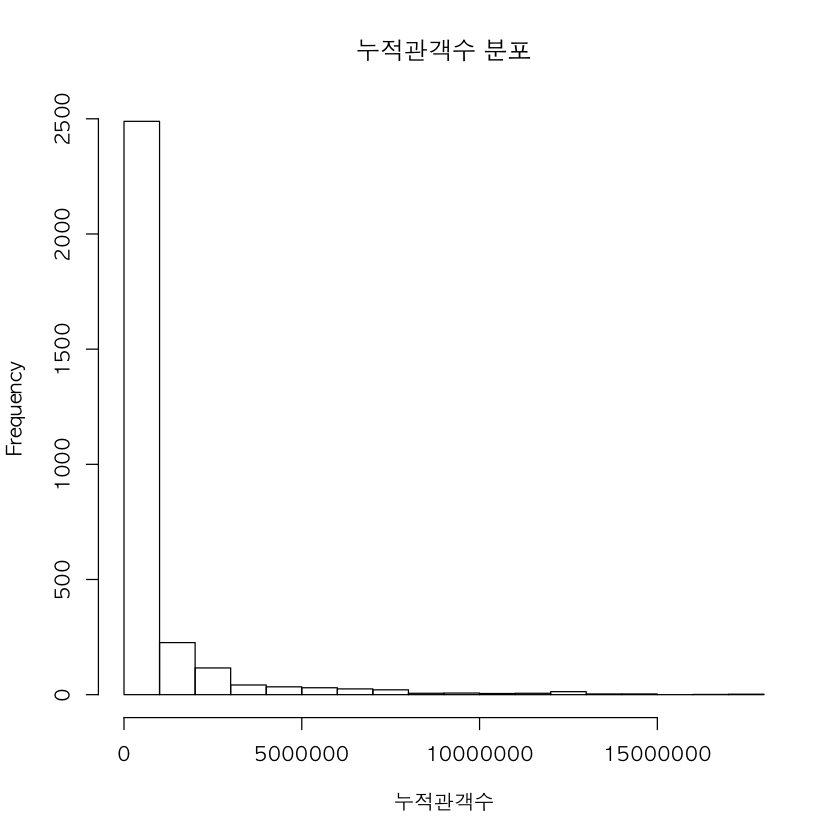

In [12]:
par(family = "AppleGothic")
options(warn = -1)
options(scipen = 100)
hist(df$누적관객수,
     main = "누적관객수 분포",
    xlab = "누적관객수"
    )

In [15]:
df<-read.csv("../movies/movie2004_2019_ver1.csv")

In [16]:
library(dplyr)

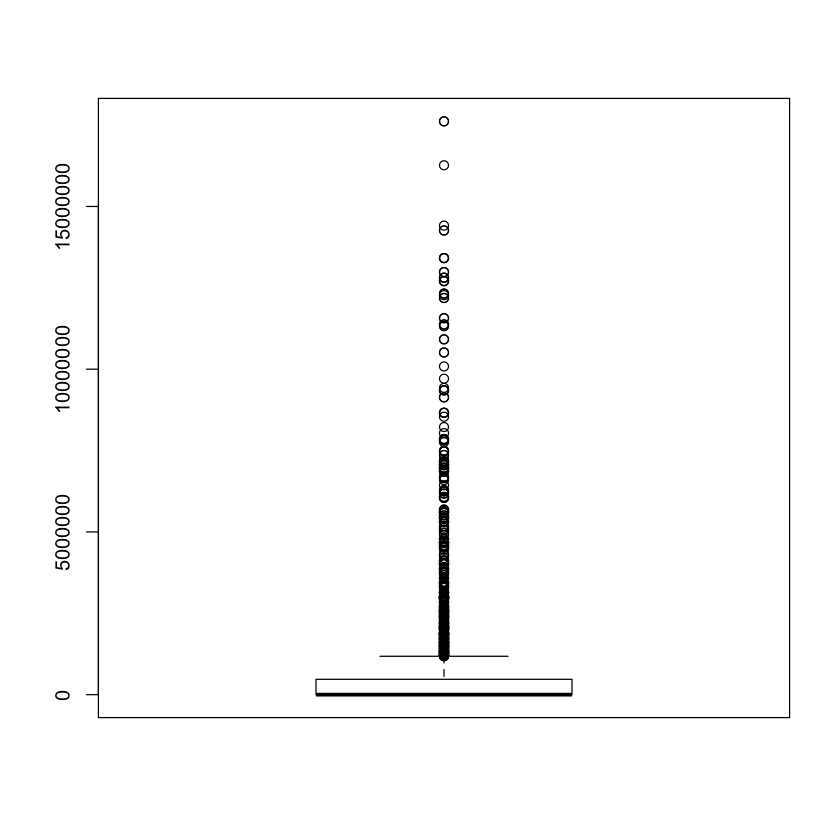

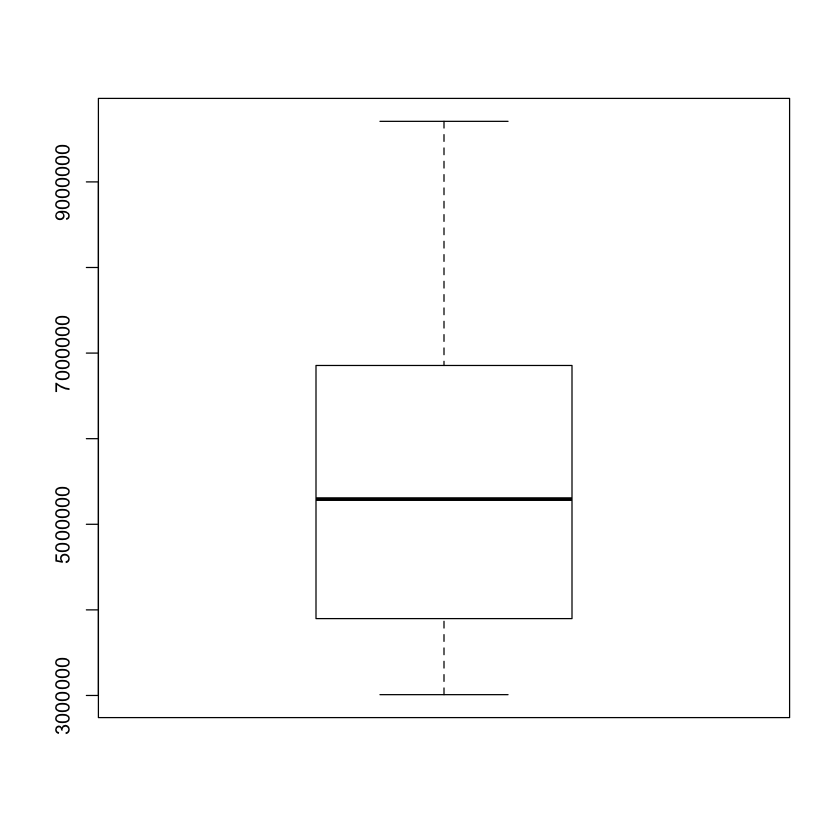

In [24]:
boxplot(df$누적관객수)
boxplot(subset(df,누적관객수>=3000000 & 누적관객수 <= 10000000 )$누적관객수)

In [25]:
df <- read.csv("../movies/data_over3mil.csv")

In [27]:
head(df)

영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,주연,제작사,조연,cluster
1987,58169776145,7232387,1299,138226,2017-12-27,CJ ENM,15세이상관람가,드라마,장준환,"김윤석,하정우,유해진,김태리,박희순,이희준",(주)우정필름,",유승목,현봉식,박지환,이용직,박지홍,김경덕,김의성,최광일,김수진,김종수,김혜정,조우진,임철형,이창훈,서현우,이현균,김승훈,박경혜,이화룡",3
7급 공무원,26380710000,4039891,475,90779,2009-04-22,롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,"코미디,액션,드라마,범죄",신태라,"김하늘,강지환","(주)하리마오픽쳐스,(주)영화사수작,(주)디씨지플러스",",류승룡,장영남,강신일,도마첸코 바딤,엘리자베스 수진 포드,코디 헌터,장남열,김정팔,유승목,김형종,김형범,박성민",1
82년생 김지영,30298542310,3678156,1486,145441,2019-10-23,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,드라마,김도영,"정유미,공유",(주)봄바람영화사,",김미경,공민정,박성연,이봉련,김성철,이얼,김미경,손성찬,강애심,류아영,김정영",1
가문의 위기(가문의 영광2),28622355500,4529876,351,61009,2005-09-07,(주)쇼박스,15세관람가,코미디,정용기,"신현준,김원희,김수미",(주)태원엔터테인먼트,",탁재훈,공형진,임형준,정준하,김해곤,정호빈",2
감기,21774884000,3117859,806,55046,2013-08-14,아이러브시네마,15세이상관람가,"드라마,어드벤처,액션",김성수,"장혁,수애,박민하","아이러브시네마,(주)아이필름홀딩스,(주)씨제이이엔엠",",유해진,이희준,김기현,이상엽,박효주,박정민,보리스 스타웃,김문수,최병모,장경업,앤드류 윌리엄 브랜드",1
감시자들,39380162179,5508017,949,100309,2013-07-03,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,"범죄,액션","조의석,김병서","설경구,정우성,한효주",영화사 집,",김병옥,진경,준호,손민석,김대진,이태형,강신하,이동휘,이화정,박지훈,김지훈,성일,변요한,장원형,박지연,최원,변정현,이동진,이도윤,정재호,김준우,이현균",2


In [30]:
str(df)

'data.frame':	108 obs. of  14 variables:
 $ 영화명    : Factor w/ 108 levels "1987","7급 공무원",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ 누적매출액: num  58169776145 26380710000 30298542310 28622355500 21774884000 ...
 $ 누적관객수: int  7232387 4039891 3678156 4529876 3117859 5508017 4452850 4313101 3024666 4111237 ...
 $ 스크린수  : int  1299 475 1486 351 806 949 1426 707 432 593 ...
 $ 상영횟수  : int  138226 90779 145441 61009 55046 100309 80359 74157 69946 106069 ...
 $ 개봉일    : Factor w/ 103 levels "2005-01-27","2005-07-29",..: 87 19 102 4 51 48 86 14 20 38 ...
 $ 배급사    : Factor w/ 17 levels "(주)넥스트엔터테인먼트월드(NEW)",..: 16 8 11 2 13 1 1 17 2 8 ...
 $ 등급      : Factor w/ 7 levels "12세관람가","12세이상관람가",..: 4 2 2 3 4 4 4 4 4 2 ...
 $ 장르      : Factor w/ 50 levels "공포(호러),멜로/로맨스,코미디",..: 3 49 3 43 8 21 33 5 6 11 ...
 $ 감독      : Factor w/ 80 levels "강대규","강우석",..: 60 34 7 64 11 70 36 2 47 48 ...
 $ 주연      : Factor w/ 108 levels "강동원,김윤석,임수정,유해진",..: 23 25 74 50 71 38 72 39 20 53 ...
 $ 제작사    : Factor w/ 92 levels "(유)

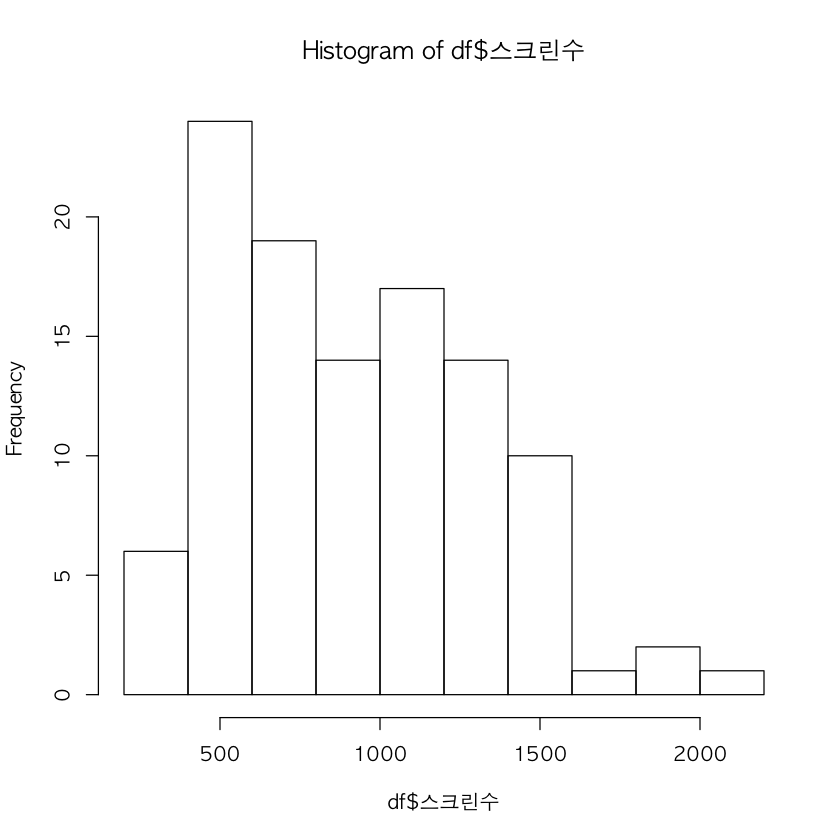

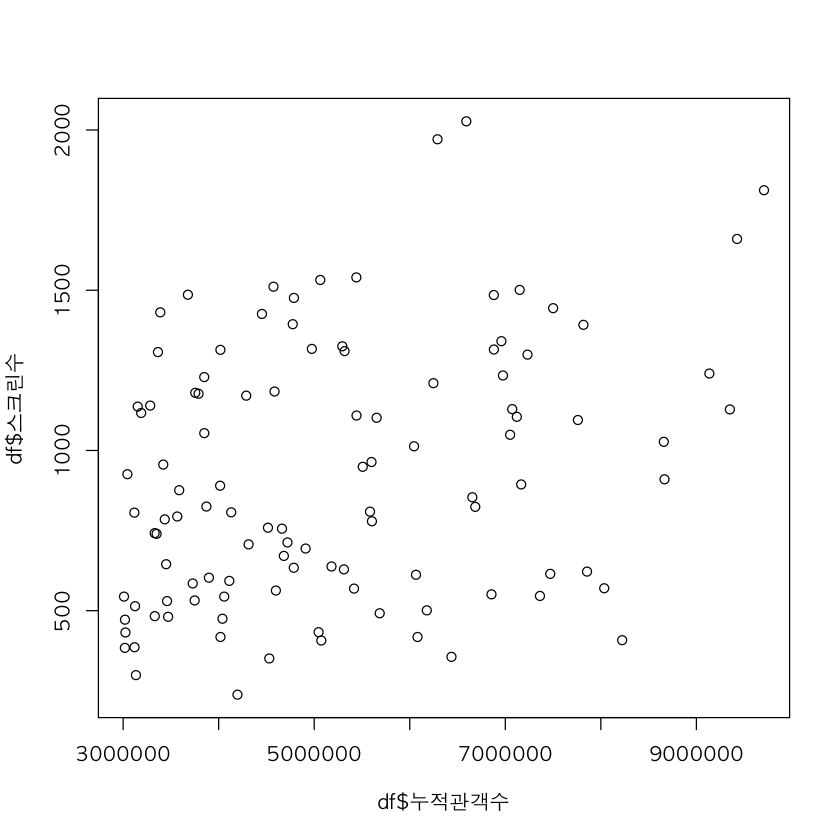

In [37]:
par(family = "AppleGothic")
options(warn = -1)
options(scipen = 100)
hist(df$스크린수)
plot(df$스크린수 ~df$누적관객수)

In [39]:
cor(df$스크린수,df$누적관객수)

[1] 0.3189024

In [42]:

length(unique(df$감독))

[1] 80